In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [4]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [5]:
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


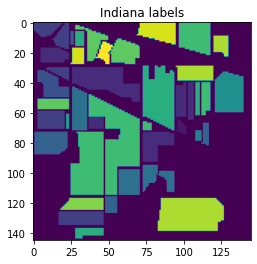

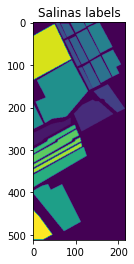

In [6]:
plt.imshow(indiana_labels)
plt.title("Indiana labels")
plt.show()
plt.imshow(salinas_labels)
plt.title("Salinas labels")
plt.show()

## PCA

In [7]:
def get_number_components(X):
    # first PCA with by keeping all features
    print("Fitting the PCA")
    pca_model = PCA()
    pca_model.fit(X)
    var_cumsum = pca_model.explained_variance_ratio_.cumsum()
    return len(var_cumsum[var_cumsum <= 0.9991])

def extract_features(X, n_components):
    pca_model = PCA(n_components=n_components)
    pca_model.fit(X)
    return pca_model.transform(X)

In [8]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [9]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 69
Number of components Salinas: 6


In [10]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [11]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (21025, 69)
Salinas reduced data shape: (111104, 6)


## Mini Batch KMeans

In [12]:
n_cluster_indiana = len(np.unique(indiana_labels))
n_cluster_salinas = len(np.unique(salinas_labels))

In [13]:
print("Number of labels Indiana: {}".format(n_cluster_indiana))
print("Number of labels Salinas: {}".format(n_cluster_salinas))

Number of labels Indiana: 17
Number of labels Salinas: 17


In [14]:
indiana_model = MiniBatchKMeans(n_clusters=n_cluster_indiana, verbose=1)
salinas_model = MiniBatchKMeans(n_clusters=n_cluster_salinas, verbose=1)

In [15]:
indiana_model.fit(X_indiana_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 14.555106
Init 2/3 with method: k-means++
Inertia for init 2/3: 12.309840
Init 3/3 with method: k-means++
Inertia for init 3/3: 12.876413
Minibatch iteration 1/21100: mean batch inertia: 0.048867, ewa inertia: 0.048867 
Minibatch iteration 2/21100: mean batch inertia: 0.040083, ewa inertia: 0.048784 
Minibatch iteration 3/21100: mean batch inertia: 0.050056, ewa inertia: 0.048796 
Minibatch iteration 4/21100: mean batch inertia: 0.042566, ewa inertia: 0.048736 
Minibatch iteration 5/21100: mean batch inertia: 0.051944, ewa inertia: 0.048767 
Minibatch iteration 6/21100: mean batch inertia: 0.045496, ewa inertia: 0.048736 
Minibatch iteration 7/21100: mean batch inertia: 0.048725, ewa inertia: 0.048736 
Minibatch iteration 8/21100: mean batch inertia: 0.043419, ewa inertia: 0.048685 
Minibatch iteration 9/21100: mean batch inertia: 0.042136, ewa inertia: 0.048623 
Minibatch iteration 10/21100: mean batch inertia: 0.043366, ewa inerti

Minibatch iteration 118/21100: mean batch inertia: 0.056674, ewa inertia: 0.045202 
Minibatch iteration 119/21100: mean batch inertia: 0.047515, ewa inertia: 0.045224 
Minibatch iteration 120/21100: mean batch inertia: 0.037406, ewa inertia: 0.045149 
Minibatch iteration 121/21100: mean batch inertia: 0.044410, ewa inertia: 0.045142 
Minibatch iteration 122/21100: mean batch inertia: 0.042967, ewa inertia: 0.045122 
Minibatch iteration 123/21100: mean batch inertia: 0.054177, ewa inertia: 0.045208 
Minibatch iteration 124/21100: mean batch inertia: 0.034503, ewa inertia: 0.045106 
Minibatch iteration 125/21100: mean batch inertia: 0.035950, ewa inertia: 0.045019 
Minibatch iteration 126/21100: mean batch inertia: 0.053973, ewa inertia: 0.045104 
Minibatch iteration 127/21100: mean batch inertia: 0.045688, ewa inertia: 0.045110 
Minibatch iteration 128/21100: mean batch inertia: 0.046899, ewa inertia: 0.045127 
Minibatch iteration 129/21100: mean batch inertia: 0.054853, ewa inertia: 0.

MiniBatchKMeans(n_clusters=17, verbose=1)

In [16]:
salinas_model.fit(X_salinas_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 5.741826
Init 2/3 with method: k-means++
Inertia for init 2/3: 5.481438
Init 3/3 with method: k-means++
Inertia for init 3/3: 5.573402
Minibatch iteration 1/111200: mean batch inertia: 0.018072, ewa inertia: 0.018072 
Minibatch iteration 2/111200: mean batch inertia: 0.020214, ewa inertia: 0.018076 
Minibatch iteration 3/111200: mean batch inertia: 0.020996, ewa inertia: 0.018081 
Minibatch iteration 4/111200: mean batch inertia: 0.019661, ewa inertia: 0.018084 
Minibatch iteration 5/111200: mean batch inertia: 0.018599, ewa inertia: 0.018085 
Minibatch iteration 6/111200: mean batch inertia: 0.016686, ewa inertia: 0.018083 
Minibatch iteration 7/111200: mean batch inertia: 0.020919, ewa inertia: 0.018088 
Minibatch iteration 8/111200: mean batch inertia: 0.023561, ewa inertia: 0.018098 
Minibatch iteration 9/111200: mean batch inertia: 0.039766, ewa inertia: 0.018137 
Minibatch iteration 10/111200: mean batch inertia: 0.017626, ewa

MiniBatchKMeans(n_clusters=17, verbose=1)

In [31]:
print(indiana_model.labels_.shape)
print(salinas_model.labels_.shape)

(21025,)
(111104,)


In [22]:
indiana_preds = indiana_model.labels_.reshape((indiana_img.shape[0], indiana_img.shape[1]))
salinas_preds = salinas_model.labels_.reshape((salinas_img.shape[0], salinas_img.shape[1]))

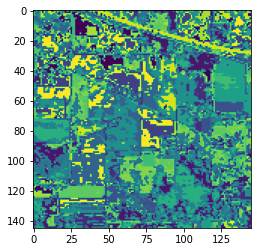

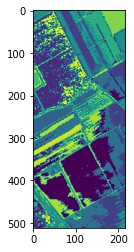

In [32]:
plt.imshow(indiana_preds)
plt.show()
plt.imshow(salinas_preds)
plt.show()